In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

import os
os.chdir("/content/drive/MyDrive/yapay_zeka_video/S-005-Shape-Classifacition")

from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import *

In [10]:
# dataset from https://www.kaggle.com/cactus3/basicshapes
# get the dataset

data_x,data_y=[],[]
img_size=28
data_main_path="shapes/"
labels=os.listdir(data_main_path)


for label in labels:
  file_path=os.listdir(data_main_path+label+"/")
  print(label+" :")
  for path in tqdm(file_path):
    img=cv2.imread(data_main_path+label+"/"+path)
    img=cv2.resize(img, (img_size,img_size), interpolation = cv2.INTER_AREA)
    data_x.append(img)
    data_y.append([1 if x==labels.index(label) else 0 for x in range(len(labels))])

  
data_x,data_y=np.array(data_x),np.array(data_y)

circles :


100%|██████████| 100/100 [00:00<00:00, 327.88it/s]


triangles :


100%|██████████| 100/100 [00:00<00:00, 336.94it/s]


squares :


100%|██████████| 100/100 [00:00<00:00, 332.88it/s]


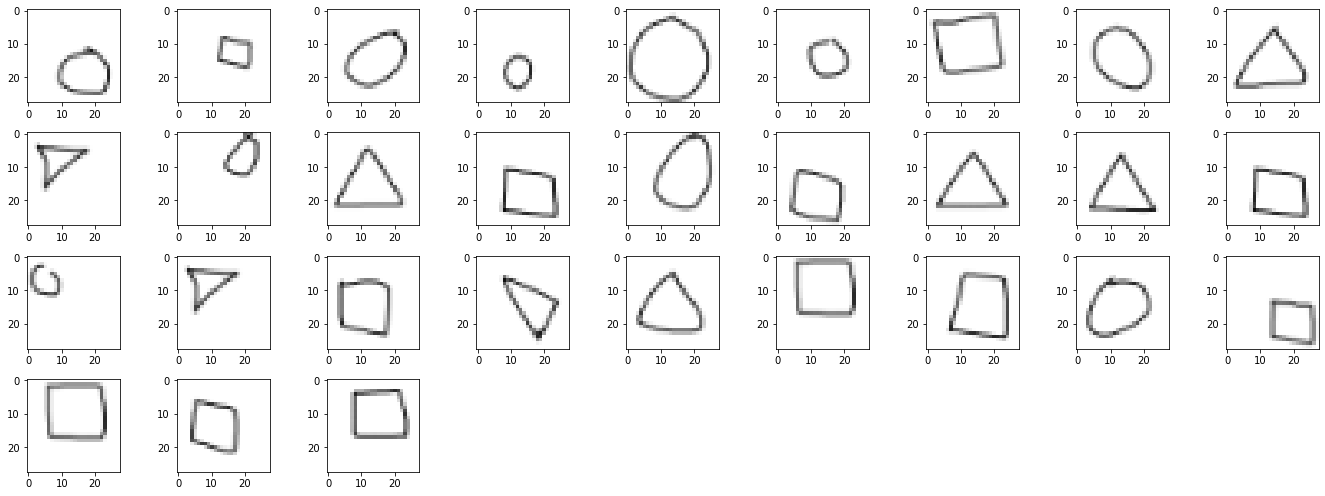

In [11]:
choice=np.random.choice(np.arange(0,len(data_x)),(30,))

plt.figure(figsize=(19,7))

for x in range(len(choice)):
  plt.subplot(4,9,x+1)
  plt.imshow(data_x[choice[x]],cmap='gray')

plt.tight_layout()
plt.show()

del choice

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33,random_state=42)

del data_x,data_y

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=20,
  zoom_range=0.2,
  shear_range=0.2,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255)

train_datagen.fit(x_train,seed=42)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen.fit(x_test,seed=42)

In [13]:
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)
print("x_test  :",x_test.shape)
print("y_test  :",y_test.shape)

x_train : (201, 28, 28, 3)
y_train : (201, 3)
x_test  : (99, 28, 28, 3)
y_test  : (99, 3)


In [16]:
dropout=0.5
tf.keras.backend.clear_session()

model=tf.keras.models.Sequential()
model.add(InputLayer(input_shape=(img_size,img_size,3)))

model.add(Conv2D(32,(3,3)))
model.add(Conv2D(32,(3,3)))
# model.add(LeakyReLU())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
# model.add(LeakyReLU())
model.add(MaxPool2D((2,2)))

# model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Flatten())

model.add(Dense(256))
model.add(Dropout(dropout))
model.add(LeakyReLU())
model.add(Dense(256))
model.add(Dropout(dropout))
model.add(LeakyReLU())
model.add(Dense(len(labels),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [17]:
history=model.fit(train_datagen.flow(x_train, y_train, batch_size=32), 
                    epochs=200,
                    steps_per_epoch=x_train.shape[0]//32, # number of images comprising of one epoch
                    validation_data=test_datagen.flow(x_test, y_test), # data for validation
                    validation_steps=x_test.shape[0]//32)

Epoch 1/200
6/6 [==============================] - 1s 87ms/step - loss: 1.3077 - accuracy: 0.2969 - val_loss: 1.1401 - val_accuracy: 0.3438
Epoch 2/200
6/6 [==============================] - 0s 47ms/step - loss: 1.1274 - accuracy: 0.3905 - val_loss: 1.1092 - val_accuracy: 0.3333
Epoch 3/200
6/6 [==============================] - 0s 41ms/step - loss: 1.1686 - accuracy: 0.3787 - val_loss: 1.1087 - val_accuracy: 0.3229
Epoch 4/200
6/6 [==============================] - 0s 42ms/step - loss: 1.0994 - accuracy: 0.3490 - val_loss: 1.0811 - val_accuracy: 0.4062
Epoch 5/200
6/6 [==============================] - 0s 44ms/step - loss: 1.1858 - accuracy: 0.2722 - val_loss: 1.1142 - val_accuracy: 0.3229
Epoch 6/200
6/6 [==============================] - 0s 43ms/step - loss: 1.1150 - accuracy: 0.3254 - val_loss: 1.0786 - val_accuracy: 0.3854
Epoch 7/200
6/6 [==============================] - 0s 42ms/step - loss: 1.0836 - accuracy: 0.4024 - val_loss: 1.0900 - val_accuracy: 0.3438
Epoch 8/200
6/6 [===

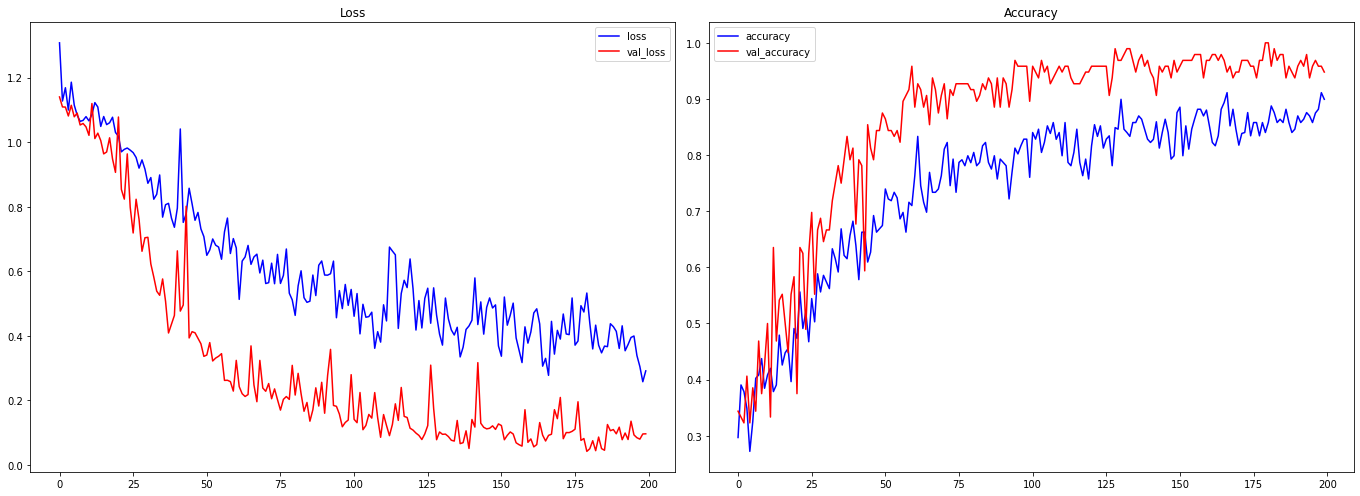

In [18]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.legend(['loss','val_loss'])
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [19]:
# evaluate the model
result_train_data=model.evaluate(test_datagen.flow(x_train, y_train),verbose=0)
result_test_data=model.evaluate(test_datagen.flow(x_test,y_test),verbose=0)

print("<======Result=======>")
print("Trian Loss     : ",round(result_train_data[0],ndigits=3))
print("Trian Accuracy :%",round(result_train_data[1],ndigits=3)*100)
print()
print("Test  Loss     : ",round(result_test_data[0],ndigits=3))
print("Test  Accuracy :%",round(result_test_data[1],ndigits=3)*100)

<======Result=======>
Trian Loss     :  0.072
Trian Accuracy :% 98.0

Test  Loss     :  0.094
Test  Accuracy :% 94.89999999999999


In [20]:
# save the model
model.save("Shape_Classifacition.h5")